In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.metrics import confusion_matrix
matplotlib.rcParams.update({'font.size': 14})
pd.set_option('display.max_columns', 10)

In [2]:
from sklearn.datasets import load_breast_cancer


data = load_breast_cancer()

In [4]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,...,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,...,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,...,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,...,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,...,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,...,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.value_counts()

,count
1,357
0,212


In [6]:
from sklearn.model_selection import train_test_split


np.random.seed(5)
features = np.random.randint(X.shape[1], size=2)


X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, features],
                                                    y,
                                                    test_size=9,
                                                    random_state=4)

In [7]:
X_test

,mean area,smoothness error
340,641.2,0.004577
382,447.8,0.005042
300,1217.0,0.006056
262,947.8,0.006717
363,838.1,0.007257
157,880.2,0.003443
120,403.3,0.006040
139,384.8,0.011270
99,642.5,0.008005


In [8]:
y_test

,0
340,1
382,1
300,0
262,0
363,1
157,1
120,1
139,1
99,0


In [9]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1,
                              max_depth=5,
                              min_samples_leaf=5)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=1)

In [10]:
tree.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 1])

In [12]:
pred_proba = tree.predict_proba(X_test)
pred_proba

array([[0.1509434 , 0.8490566 ],
       [0.03125   , 0.96875   ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.03370787, 0.96629213],
       [0.45454545, 0.54545455]])

In [92]:
df_pred = pd.DataFrame({
    'probability': pred_proba[:, 1],
    'label': y_test
})

df_pred = df_pred.sort_values(by='probability')
df_pred

,probability,label
300,0.000000,0
262,0.000000,0
363,0.000000,1
157,0.000000,1
99,0.545455,0
340,0.849057,1
139,0.966292,1
382,0.968750,1
120,1.000000,1


Let's combine the predicted probabilities of being first class and the true target values into a dataframe and sort by sample, small probabilities first, then large probabilities.

In [69]:

def confusion_matrix_new(y_true,y_pred):
  cm = confusion_matrix(y_true, y_pred)
  # Extract TP, FP, FN, TN values
  tn, fp, fn, tp  = cm.ravel()
  # Create heatmap with annotations
  sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',cbar=False,
              annot_kws={'size': 14, 'weight': 'bold'})
  # Add annotations for each box
  plt.text(0.5, 0.8, f'TN\n', ha='center',
           va='center', fontsize=12, fontweight='bold')
  plt.text(0.5, 1.8, f'FN\n', ha='center',
           va='center', fontsize=12, fontweight='bold')
  plt.text(1.5, 0.8, f'FP\n', ha='center',
           va='center', fontsize=12, fontweight='bold')
  plt.text(1.5, 1.8, f'TP\n', ha='center',
           va='center', fontsize=12, fontweight='bold')

  # Set title and axis labels
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  return cm
  # Show plot
  plt.show()

$$TPR = \frac{TP}{TP+FN}$$


$$FPR = \frac{FP}{FP+TN}$$

In [93]:


threshold=1
df_pred['thre_1'] = (df_pred['probability'] >= threshold).astype('int')
threshold=0.968750
df_pred['thre_0.968750	'] = (df_pred['probability'] >= threshold).astype('int')
threshold=0.849057
df_pred['thre_0.849057'] = (df_pred['probability'] >= threshold).astype('int')
threshold=0.84
df_pred['thre_0.84'] = (df_pred['probability'] >= threshold).astype('int')
threshold=0.545455
df_pred['thre_0.545455'] = (df_pred['probability'] >= threshold).astype('int')
threshold=0.54
df_pred['thre_0.54'] = (df_pred['probability'] >= threshold).astype('int')
threshold=0.0
df_pred['thre_0.0'] = (df_pred['probability'] >= threshold).astype('int')

In [94]:
df_pred

,probability,label,thre_1,thre_0.968750\t,thre_0.849057,thre_0.84,thre_0.545455,thre_0.54,thre_0.0
300,0.000000,0,0,0,0,0,0,0,1
262,0.000000,0,0,0,0,0,0,0,1
363,0.000000,1,0,0,0,0,0,0,1
157,0.000000,1,0,0,0,0,0,0,1
99,0.545455,0,0,0,0,0,0,1,1
340,0.849057,1,0,0,0,1,1,1,1
139,0.966292,1,0,0,1,1,1,1,1
382,0.968750,1,0,1,1,1,1,1,1
120,1.000000,1,1,1,1,1,1,1,1


TPR 0.16666666666666666
FPR 0.0


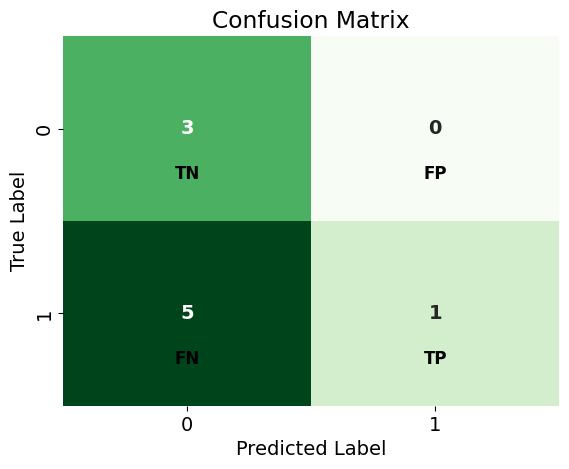

In [95]:
cm =confusion_matrix_new(y_true=df_pred['label'],
                     y_pred=df_pred['thre_1'])

TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

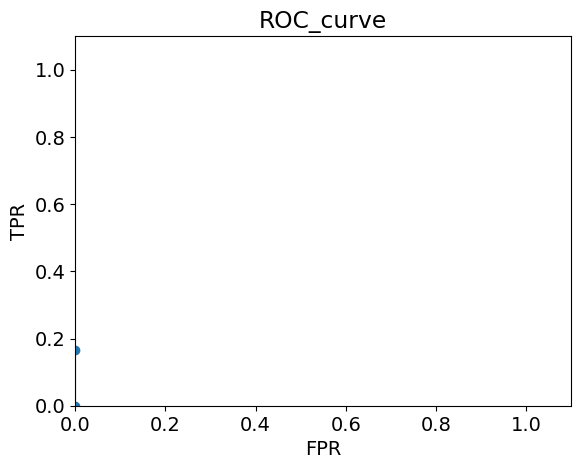

In [96]:
TPRs = [0]
FPRs = [0]

TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

TPR 0.6666666666666666
FPR 0.0


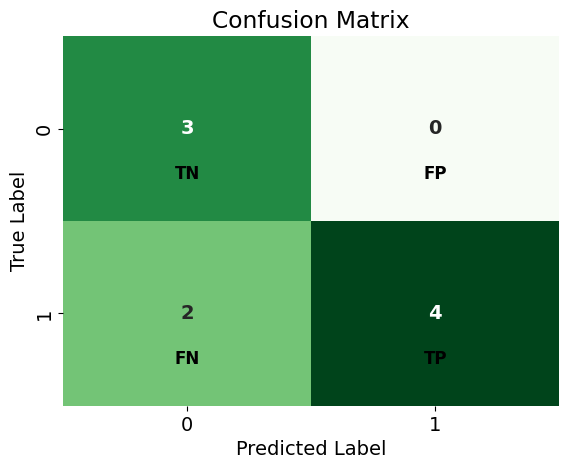

In [97]:
cm =confusion_matrix_new(y_true=df_pred['label'],
                     y_pred=df_pred['thre_0.84'])

TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

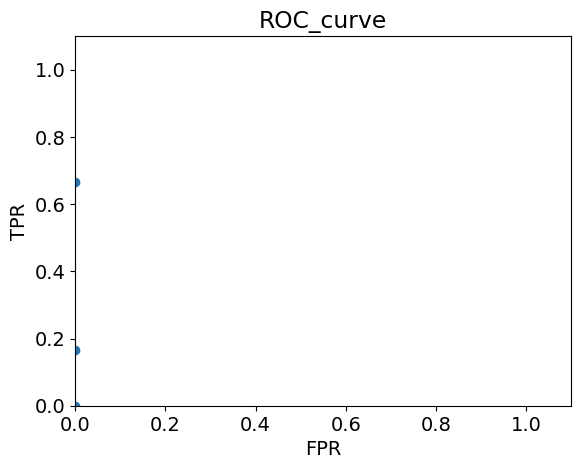

In [98]:


TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

TPR 0.6666666666666666
FPR 0.3333333333333333


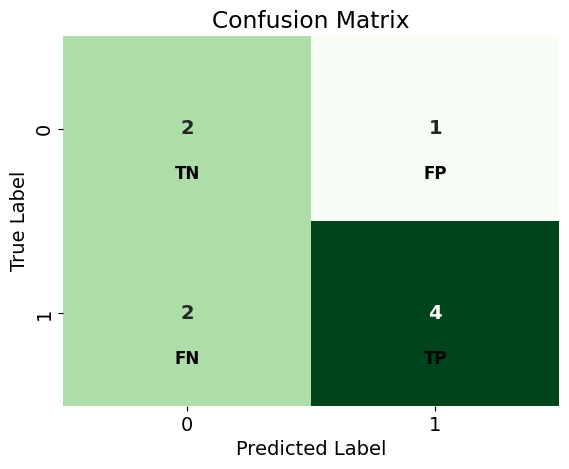

In [99]:
cm =confusion_matrix_new(y_true=df_pred['label'],
                     y_pred=df_pred['thre_0.54'])

TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

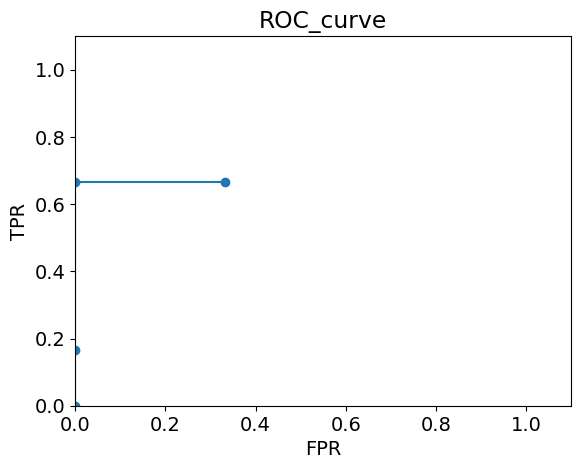

In [100]:

TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

TPR 1.0
FPR 1.0


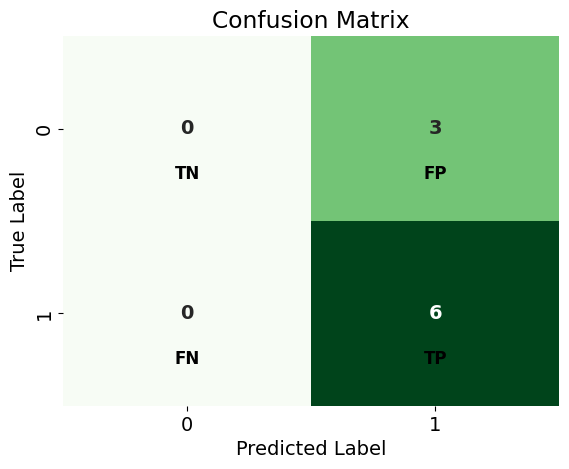

In [101]:
cm =confusion_matrix_new(y_true=df_pred['label'],
                     y_pred=df_pred['thre_0.0'])

TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
print('TPR', TPR)
print('FPR', FPR)

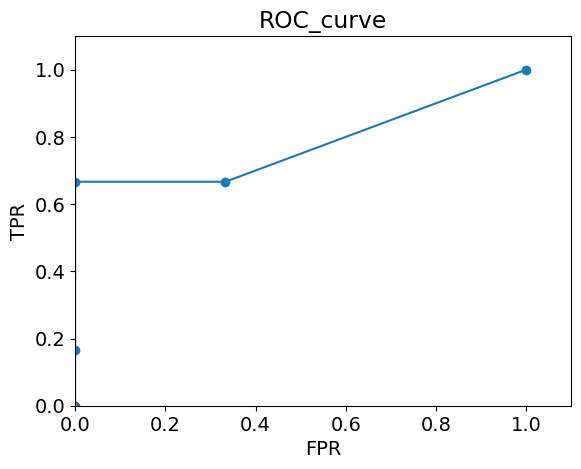

In [102]:
TPRs.append(TPR)
FPRs.append(FPR)

plt.plot(FPRs, TPRs, marker='o')
plt.ylim([0, 1.1]);plt.xlim([0, 1.1])
plt.xlabel('FPR');plt.ylabel('TPR')
plt.title('ROC_curve');

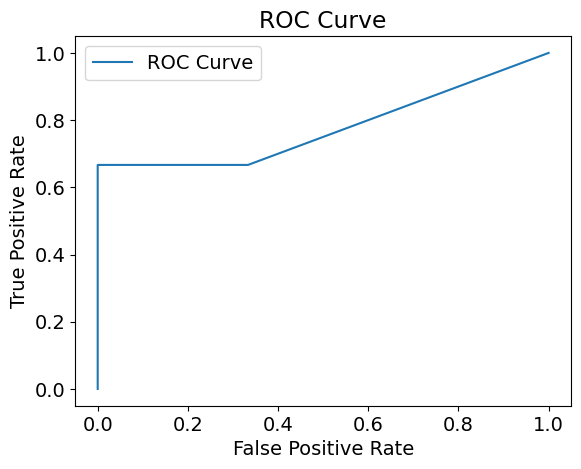

In [103]:
from sklearn.metrics import roc_curve, RocCurveDisplay

# Generate predicted probabilities
y_scores = tree.predict_proba(X_test)[:, 1]  # Use the positive class probabilities
fpr, tpr, _ = roc_curve(y_test, y_scores)

# Plot ROC curve
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
